# What this is about
- This script performs EDA on the baseline demographic data set and to re-creates the tabl for the paper
- Preliminary models will be fitted to assess data use
- competing models will be validated on heldout data
- examine feature of derived/ transformed features

# Import packages

In [226]:
import pandas as pd

import sklearn

from sklearn.preprocessing import StandardScaler as scaler

import numpy as np

from numpy import asarray

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from joblib import dump, load

import matplotlib.pyplot as plt

import seaborn as sns

# Read data

In [118]:
baseline_df = pd.read_csv('./baseline_data_revised.csv')

In [119]:
baseline_df.shape

(4852, 97)

In [124]:
print(len([*set(baseline_df['RID'])]),'unique patients')

129 unique patients


In [120]:
baseline_df.head()

,Phase_x,ID_x,RID,PTID,SITEID_x,VISCODE,VISCODE2,USERDATE_x,USERDATE2_x,EXAMDATE_x,...,EXAMDATE_y,RUNDATE,ABETA,PTAU,TAU,APGEN1,APGEN2,MMSCORE,TOTAL11,TOTALMOD
0,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2006-06-16,2016-11-28,826.8,10.41,126.6,3,3,26.0,-4.00,-4.00
1,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2006-06-16,2016-11-28,826.8,10.41,126.6,3,3,26.0,6.00,8.00
2,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2006-06-16,2016-11-28,826.8,10.41,126.6,3,3,26.0,4.67,12.67
3,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2006-06-16,2016-11-28,826.8,10.41,126.6,3,3,26.0,7.67,12.67
4,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2006-06-16,2016-11-28,826.8,10.41,126.6,3,3,26.0,5.00,10.00


In [5]:
baseline_df.columns

Index(['Phase_x', 'ID_x', 'RID', 'PTID', 'SITEID_x', 'VISCODE', 'VISCODE2',
       'USERDATE_x', 'USERDATE2_x', 'EXAMDATE_x', 'DXCHANGE', 'DXCURREN',
       'DXCONV', 'DXCONTYP', 'DXREV', 'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES',
       'DXMPTR1', 'DXMPTR2', 'DXMPTR3', 'DXMPTR4', 'DXMPTR5', 'DXMPTR6',
       'DXMDUE', 'DXMOTHET', 'DXMOTHSP', 'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES',
       'DXAPP', 'DXAPROB', 'DXAMETASP', 'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP',
       'DXAMETSP', 'DXAOTHSP', 'DXPARK', 'DXPARKSP', 'DXPDES', 'DXPCOG',
       'DXPATYP', 'DXPOTHSP', 'DXDEP', 'DXDEPSP', 'DXOTHDEM', 'DXODES',
       'DXOOTHSP', 'DXCONFID', 'DIAGNOSIS', 'update_stamp_x', 'Phase_y',
       'ID_y', 'SITEID_y', 'VISCODE_x', 'VISCODE2_x', 'USERDATE_y',
       'USERDATE2_y', 'PTSOURCE', 'PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND',
       'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT',
       'PTRTYR', 'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC',
       'PTCOGBEG', 'PTMCIBEG', 'P

In [276]:
feature_use = ['RID','VISCODE','DXCHANGE', 'DXCURREN',
       'DXCONV', 'DXCONTYP', 'DXREV', 'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES',
       'DXMPTR1', 'DXMPTR2', 'DXMPTR3', 'DXMPTR4', 'DXMPTR5', 'DXMPTR6',
       'DXMDUE', 'DXMOTHET', 'DXMOTHSP', 'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES',
       'DXAPP', 'DXAPROB', 'DXAMETASP', 'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP',
       'DXAMETSP', 'DXAOTHSP', 'DXPARK', 'DXPARKSP', 'DXPDES', 'DXPCOG',
       'DXPATYP', 'DXPOTHSP', 'DXDEP', 'DXDEPSP', 'DXOTHDEM', 'DXODES',
       'DXOOTHSP', 'DXCONFID', 'DIAGNOSIS','PTSOURCE', 'PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND',
       'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT',
       'PTRTYR', 'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC',
       'PTCOGBEG', 'PTMCIBEG', 'PTADBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT','RUNDATE',
       'ABETA', 'PTAU', 'TAU','TOTAL11','TOTALMOD','APGEN1','APGEN2','MMSCORE']

In [277]:
base_df = baseline_df[feature_use]

In [278]:
base_df.shape

(4852, 77)

In [279]:
base_df.head()

,RID,VISCODE,DXCHANGE,DXCURREN,DXCONV,DXCONTYP,DXREV,DXNORM,DXNODEP,DXMCI,...,PTRACCAT,RUNDATE,ABETA,PTAU,TAU,TOTAL11,TOTALMOD,APGEN1,APGEN2,MMSCORE
0,514,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,5.0,2016-11-28,826.8,10.41,126.6,-4.00,-4.00,3,3,26.0
1,514,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,5.0,2016-11-28,826.8,10.41,126.6,6.00,8.00,3,3,26.0
2,514,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,5.0,2016-11-28,826.8,10.41,126.6,4.67,12.67,3,3,26.0
3,514,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,5.0,2016-11-28,826.8,10.41,126.6,7.67,12.67,3,3,26.0
4,514,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,5.0,2016-11-28,826.8,10.41,126.6,5.00,10.00,3,3,26.0


In [401]:
base_df['DXNORM'].value_counts()

-4.0    3417
 1.0    1435
Name: DXNORM, dtype: int64

# Categorical Feature Charcteristics

In [280]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 77 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RID        4852 non-null   int64  
 1   VISCODE    4852 non-null   object 
 2   DXCHANGE   0 non-null      float64
 3   DXCURREN   4852 non-null   float64
 4   DXCONV     4852 non-null   float64
 5   DXCONTYP   4852 non-null   float64
 6   DXREV      4852 non-null   float64
 7   DXNORM     4852 non-null   float64
 8   DXNODEP    4852 non-null   float64
 9   DXMCI      4852 non-null   float64
 10  DXMDES     4852 non-null   object 
 11  DXMPTR1    4852 non-null   float64
 12  DXMPTR2    4852 non-null   float64
 13  DXMPTR3    4852 non-null   float64
 14  DXMPTR4    4852 non-null   float64
 15  DXMPTR5    4852 non-null   float64
 16  DXMPTR6    4852 non-null   float64
 17  DXMDUE     4852 non-null   float64
 18  DXMOTHET   4852 non-null   int64  
 19  DXMOTHSP   4852 non-null   object 
 20  DXDSEV  

In [383]:
base_df[['PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND',
       'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT',
       'PTRTYR', 'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC',
       'PTCOGBEG', 'PTMCIBEG', 'PTADBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT']] = base_df[['PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND',
       'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT',
       'PTRTYR', 'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC',
       'PTCOGBEG', 'PTMCIBEG', 'PTADBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT']].astype('category')

In [129]:
base_df[['PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND',
       'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT',
       'PTRTYR', 'PTHOME', 'PTOTHOME']].describe()

,PTGENDER,PTDOBMM,PTDOBYY,PTHAND,PTMARRY,PTEDUCAT,PTWORKHS,PTWORK,PTWRECNT,PTNOTRT,PTRTYR,PTHOME,PTOTHOME
count,4507.0,4281.0,4281.0,4507.0,4852.0,4479.0,2688.0,4852,4852,4852.0,4852,4852.0,4852
unique,3.0,12.0,29.0,3.0,6.0,13.0,1.0,149,162,4.0,109,9.0,4
top,1.0,12.0,1935.0,1.0,1.0,16.0,-4.0,-4,Professor,1.0,-4,1.0,-4
freq,2502.0,631.0,606.0,4044.0,3913.0,893.0,2688.0,571,124,4431.0,421,3518.0,4784


In [130]:
base_df[['PTTLANG', 'PTPLANG', 'PTPSPEC',
       'PTCOGBEG', 'PTMCIBEG', 'PTADBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT']].describe()

,PTTLANG,PTPLANG,PTPSPEC,PTCOGBEG,PTMCIBEG,PTADBEG,PTADDX,PTETHCAT,PTRACCAT
count,4507.0,4507.0,4852,1042.0,487.0,2837.0,1042.0,4507.0,4507.0
unique,2.0,4.0,2,11.0,7.0,14.0,6.0,4.0,5.0
top,1.0,1.0,-4,9999.0,2006.0,-4.0,9999.0,2.0,5.0
freq,4281.0,4160.0,4836,328.0,129.0,2284.0,696.0,4136.0,3927.0


In [131]:
cat_features = ['PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND',
       'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT',
       'PTRTYR', 'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC',
       'PTCOGBEG', 'PTMCIBEG', 'PTADBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT']

## Observe the distribution of counts in each of the categorical features

In [132]:
for cats in cat_features:
    
    out = base_df[cats].value_counts()
    
    print(out)

1.0     2502
2.0     1779
-4.0     226
Name: PTGENDER, dtype: int64
12.0    631
6.0     551
9.0     462
7.0     411
8.0     358
11.0    311
4.0     301
5.0     294
10.0    263
2.0     251
3.0     228
1.0     220
Name: PTDOBMM, dtype: int64
1935.0    606
1928.0    357
1932.0    340
1926.0    260
1934.0    251
1937.0    245
1933.0    199
1927.0    195
1945.0    182
1929.0    165
1930.0    154
1939.0    146
1923.0    144
1931.0    142
1941.0    124
1922.0    109
1925.0    108
1920.0    106
1940.0    104
1921.0     76
1919.0     60
1924.0     56
1918.0     38
1944.0     30
1951.0     24
1917.0     20
1938.0     16
1942.0     14
1948.0     10
Name: PTDOBYY, dtype: int64
1.0     4044
2.0      237
-4.0     226
Name: PTHAND, dtype: int64
1.0     3913
2.0      758
3.0       66
4.0       50
5.0       35
-4.0      30
Name: PTMARRY, dtype: int64
16.0    893
18.0    754
12.0    742
20.0    598
14.0    441
15.0    250
-4.0    226
13.0    225
17.0    196
10.0     88
8.0      28
9.0      20
19.0     1

## Selected categorical features for use

In [21]:
cat_features_use = ['PTGENDER','PTDOBMM','PTDOBYY','PTHAND','PTMARRY','PTEDUCAT',
                    'PTNOTRT','PTHOME','PTTLANG','PTCOGBEG','PTMCIBEG','PTETHCAT','PTRACCAT']

In [44]:
def impute_cat_fatures(df, cat_list):
    
    df_use = df
    
    for cat_var in cat_list:
        
        check = sum(df_use[cat_var].isnull())
        
        if check is not None:
            
            get_mode = df_use[cat_var].mode().values[0]
            
            df_use[cat_var] = df_use[cat_var].replace(-4.0,get_mode)
        
        else:
            
            df_use[cat_var] = fd_use[cat_var]
            
    return df_use


def add_percentages(df,cat_list):
    
    df_use = df
    
    for cat_var in cat_list:
        
        values = df_use[cat_var].value_counts().values.tolist()
        
        index =  df_use[cat_var].value_counts().index.tolist()
        
        perc = [round(i/sum(values)*100,2) for i in values]
        
        out_df = pd.DataFrame({cat_var:index,'Counts':values,'Percentage':perc})
        
        print(out_df)

In [380]:
base_df1 = impute_cat_fatures(base_df, cat_features_use)

## Check that mising values have been replaced with the mode

In [146]:
for var in cat_features_use:
    
    print(base_df1[var].value_counts())

1.0    2728
2.0    1779
Name: PTGENDER, dtype: int64
12.0    631
6.0     551
9.0     462
7.0     411
8.0     358
11.0    311
4.0     301
5.0     294
10.0    263
2.0     251
3.0     228
1.0     220
Name: PTDOBMM, dtype: int64
1935.0    606
1928.0    357
1932.0    340
1926.0    260
1934.0    251
1937.0    245
1933.0    199
1927.0    195
1945.0    182
1929.0    165
1930.0    154
1939.0    146
1923.0    144
1931.0    142
1941.0    124
1922.0    109
1925.0    108
1920.0    106
1940.0    104
1921.0     76
1919.0     60
1924.0     56
1918.0     38
1944.0     30
1951.0     24
1917.0     20
1938.0     16
1942.0     14
1948.0     10
Name: PTDOBYY, dtype: int64
1.0    4270
2.0     237
Name: PTHAND, dtype: int64
1.0    3943
2.0     758
3.0      66
4.0      50
5.0      35
Name: PTMARRY, dtype: int64
16.0    1119
18.0     754
12.0     742
20.0     598
14.0     441
15.0     250
13.0     225
17.0     196
10.0      88
8.0       28
9.0       20
19.0      18
Name: PTEDUCAT, dtype: int64
1.0    4460
0.0  

## Categorical feature distribution with percentages

In [147]:
add_percentages(base_df1,cat_features_use)

   PTGENDER  Counts  Percentage
0       1.0    2728       60.53
1       2.0    1779       39.47
    PTDOBMM  Counts  Percentage
0      12.0     631       14.74
1       6.0     551       12.87
2       9.0     462       10.79
3       7.0     411        9.60
4       8.0     358        8.36
5      11.0     311        7.26
6       4.0     301        7.03
7       5.0     294        6.87
8      10.0     263        6.14
9       2.0     251        5.86
10      3.0     228        5.33
11      1.0     220        5.14
    PTDOBYY  Counts  Percentage
0    1935.0     606       14.16
1    1928.0     357        8.34
2    1932.0     340        7.94
3    1926.0     260        6.07
4    1934.0     251        5.86
5    1937.0     245        5.72
6    1933.0     199        4.65
7    1927.0     195        4.56
8    1945.0     182        4.25
9    1929.0     165        3.85
10   1930.0     154        3.60
11   1939.0     146        3.41
12   1923.0     144        3.36
13   1931.0     142        3.32
14   194

## Numerical feature distribution

In [148]:
base_df1[['ABETA','TAU','PTAU','TOTAL11','TOTALMOD','APGEN1','APGEN2','MMSCORE']].isnull()

,ABETA,TAU,PTAU,TOTAL11,TOTALMOD,APGEN1,APGEN2,MMSCORE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4847,False,False,False,False,False,False,False,False
4848,False,False,False,False,False,False,False,False
4849,False,False,False,False,False,False,False,False
4850,False,False,False,False,False,False,False,False


In [135]:
sum(base_df1['ABETA'].isnull())

0

In [136]:
sum(base_df1['TAU'].isnull())

0

In [137]:
sum(base_df1['PTAU'].isnull())

0

In [149]:
base_df[['ABETA','TAU','PTAU','TOTAL11','TOTALMOD','APGEN1','APGEN2','MMSCORE']].describe()

,ABETA,TAU,PTAU,TOTAL11,TOTALMOD,APGEN1,APGEN2,MMSCORE
count,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4834.000000
mean,940.155874,309.286707,30.587209,11.649646,18.397778,2.974237,3.467436,24.996483
std,587.205703,117.887452,13.522373,6.790476,9.653713,0.403494,0.498990,4.794363
min,291.100000,80.000000,8.000000,-4.000000,-4.000000,2.000000,3.000000,-1.000000
25%,556.700000,228.600000,20.830000,6.330000,10.670000,3.000000,3.000000,23.000000
50%,702.200000,288.800000,27.780000,10.670000,17.330000,3.000000,3.000000,26.000000
75%,1288.000000,375.000000,37.960000,15.330000,24.670000,3.000000,4.000000,28.000000
max,3592.000000,1300.000000,120.000000,53.000000,67.000000,4.000000,4.000000,30.000000


## Derived biomarkers

In [381]:
base_df1['rtaubeta'] = base_df1['TAU']/base_df1['ABETA']

base_df1['rptaubeta'] = base_df1['PTAU']/base_df1['ABETA']

In [151]:
base_df1[['rtaubeta','rptaubeta']].describe()

,rtaubeta,rptaubeta
count,4852.000000,4852.000000
mean,0.459167,0.046614
std,0.311778,0.034583
min,0.105847,0.008962
25%,0.191770,0.017123
50%,0.423122,0.044991
75%,0.634766,0.061524
max,2.131497,0.196754


In [61]:
scaled = scaler()

In [114]:
def scale_num_features(df,num_feature_list):
    
    df_use = df
    
    for f in num_feature_list:
        
        out = df_use[f].describe()
        
        mean = out[1]
        
        sd = out[2]
        
        scaled = round((df_use[f]- mean)/sd,3)
        
        scaled_list = scaled.tolist()
        
        df_use[f + '_scaled'] = scaled_list
        
    return df_use

In [382]:
num_feature_list = ['ABETA','TAU','PTAU','TOTAL11','TOTALMOD','APGEN1','APGEN2','MMSCORE']
base_df2 = scale_num_features(base_df1,num_feature_list)

In [402]:
base_df['DXNORM'].value_counts()

-4.0    3417
 1.0    1435
Name: DXNORM, dtype: int64

In [409]:
len([*set(base_df2['RID'])])

129

In [408]:
len([*set(base_df2[base_df2['DXNORM']==1]['RID'])])

32

In [158]:
base_df2[['ABETA_scaled','TAU_scaled','PTAU_scaled','TOTAL11_scaled','TOTALMOD_scaled','APGEN1_scaled','APGEN2_scaled','MMSCORE_scaled']].describe()

,ABETA_scaled,TAU_scaled,PTAU_scaled,TOTAL11_scaled,TOTALMOD_scaled,APGEN1_scaled,APGEN2_scaled,MMSCORE_scaled
count,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4834.000000
mean,-0.000050,-0.000026,-0.000049,-0.000018,0.000023,0.000066,-0.000258,-0.000033
std,0.999999,0.999940,1.000020,1.000000,0.999972,1.000087,0.999976,0.999978
min,-1.105000,-1.945000,-1.670000,-2.305000,-2.320000,-2.415000,-0.937000,-5.422000
25%,-0.653000,-0.684000,-0.722000,-0.783000,-0.800000,0.064000,-0.937000,-0.416000
50%,-0.405000,-0.174000,-0.208000,-0.144000,-0.111000,0.064000,-0.937000,0.209000
75%,0.592000,0.557000,0.545000,0.542000,0.650000,0.064000,1.067000,0.626000
max,4.516000,8.404000,6.612000,6.089000,5.035000,2.542000,1.067000,1.044000


## Distribution of the standardized numerical features
- The distributions seem well within the 3rd standard deviation for the most with a few in the 4th sd and beyond

<AxesSubplot:ylabel='Frequency'>

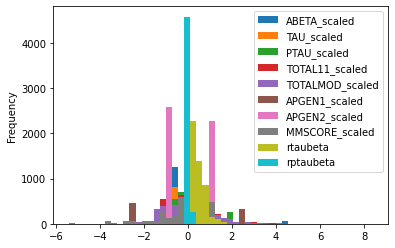

In [162]:
base_df2[['ABETA_scaled','TAU_scaled','PTAU_scaled','TOTAL11_scaled','TOTALMOD_scaled','APGEN1_scaled','APGEN2_scaled','MMSCORE_scaled','rtaubeta','rptaubeta']].plot(kind='hist',bins = 50)

In [404]:
def make_scatter_plots(df, x,y):
    
    plt.scatter(df[x],df[y])
        
    plt.xlabel(x)
    
    plt.ylabel(y)

    plt.show()
        

def make_hist_plots(df, num_feature_list_model):
    
    for feature in num_feature_list_model:
        
        plt.hist(df[feature],bins=20)
        
        plt.legend(loc='upper right',labels=[feature])

        plt.show()

def cluster_models(df_use, comps, state_use, num_feature_list_model, save=True):
    
    df = df_use
    
    df_no_na_rid = df[num_feature_list+['RID']].dropna()
    
    df_no_na_rid = df_no_na_rid.drop_duplicates()
    
    df_no_na = df_no_na_rid.drop(columns='RID')
    
    df_num = np.array(df_no_na)
    
    gm = GaussianMixture(n_components = comps, random_state = state_use).fit(df_num)
    
    gm_clusters = gm.predict(df_num)
    
    km = KMeans(n_clusters = comps, random_state = state_use).fit(df_num)
    
    df_no_na['km_clusters'] = km.labels_
    
    df_no_na['gm_clusters'] = gm_clusters
    
    df_no_na[['km_clusters','gm_clusters']] = df_no_na[['km_clusters','gm_clusters']].astype('category')
    
    if save:
    
        dump(gm, 'gm_cluster_model.joblib')
    
        dump(km, 'km_clusters_model.joblib')
        
        df_no_na['RID'] = df_no_na_rid['RID']
        
        return df_no_na
        
    else:
        
        df_no_na['RID'] = df_no_na_rid['RID']
        
        return df_no_na  
    

def fit_cluster_model_and_visualize(df, comps, state_use, feature_use_list, save=True):
    
    state_use = state_use

    comps = comps

    df_use = df

    num_feature_list_model_use = feature_use_list 
    
    # fit

    df_clusters = cluster_models(df_use, comps, state_use, num_feature_list_model_use, save=False)
    
    # visualize
    
    sns.set_theme(style="ticks")
    
    vis_features1 = feature_use_list + ['km_clusters']
    
    vis_features2 = feature_use_list + ['gm_clusters']
    
    ####### visualize km and gm performance

    df_sea1 = df_clusters[vis_features1]

    print(sns.pairplot(df_sea1,hue='km_clusters', height = 8, size = 5))
    
    
    df_sea2 = df_clusters[vis_features2]

    print(sns.pairplot(df_sea2,hue='gm_clusters', height = 8, size = 5))
    
    return df_clusters

## Marginal  distributions
- The marginal distributions of the derived outcomes of interest indicate subgroups in the distribution
- The mariginal distribution of the raw outcomes indicate very little evidence of subgroups 

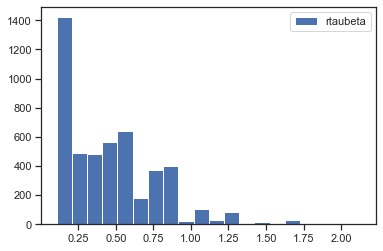

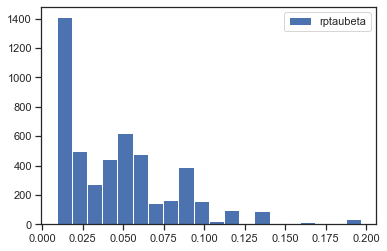

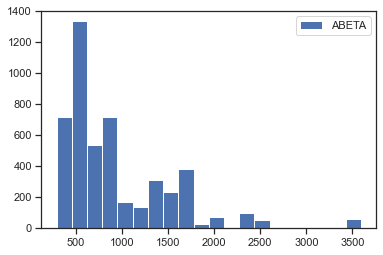

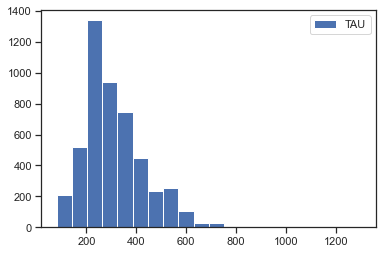

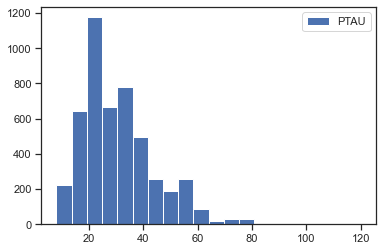

In [407]:
num_feature_list_model = ['rtaubeta','rptaubeta','ABETA','TAU','PTAU']

make_hist_plots(base_df2, num_feature_list_model)

## Joint distributions
- The joint distribution between the derived outcomes show very little sign of separation between the underlying groups

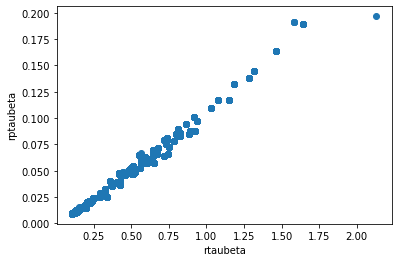

In [214]:
make_scatter_plots(base_df, 'rtaubeta','rptaubeta')

- Here there seem to be two clear groups that can be modeled.

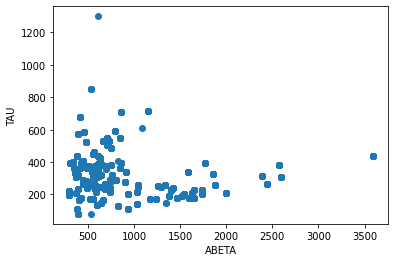

In [215]:
make_scatter_plots(base_df, 'ABETA','TAU')

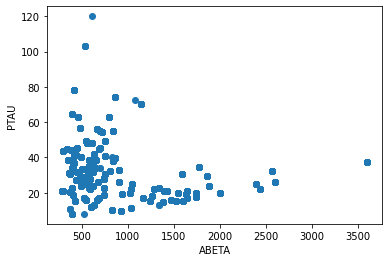

In [216]:
make_scatter_plots(base_df, 'ABETA','PTAU')

## Fit three cluster model

In [313]:
import warnings

warnings.filterwarnings('ignore')

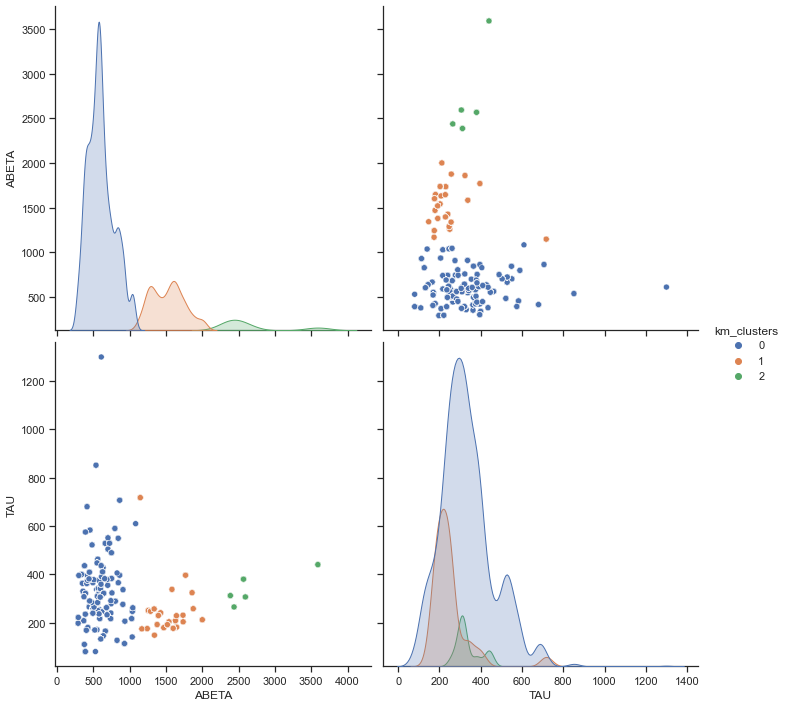

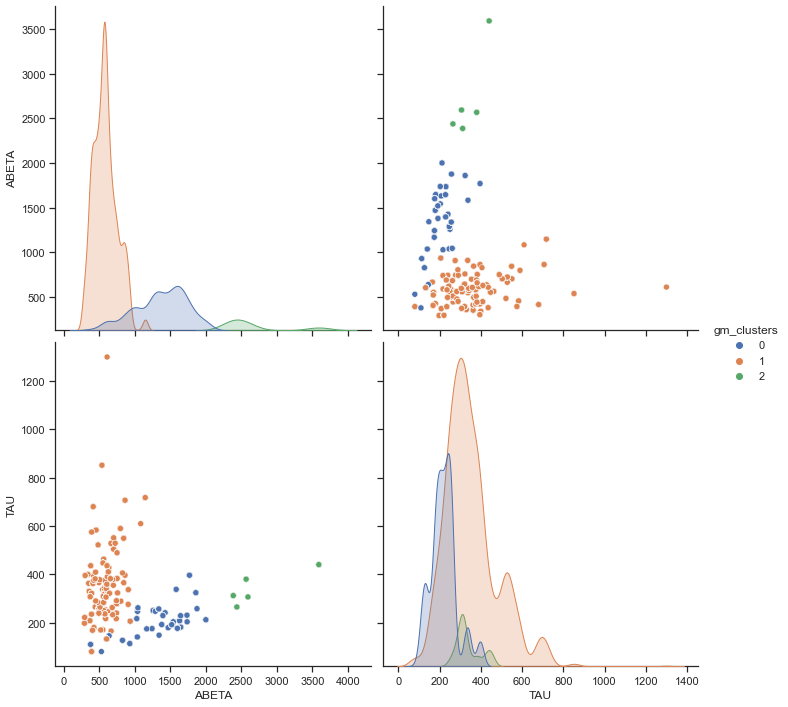

In [372]:
clusters3 = fit_cluster_model_and_visualize(base_df2, comps=3, state_use=60, feature_use_list=['ABETA','TAU'], save=False)

# Fit 4 cluster model

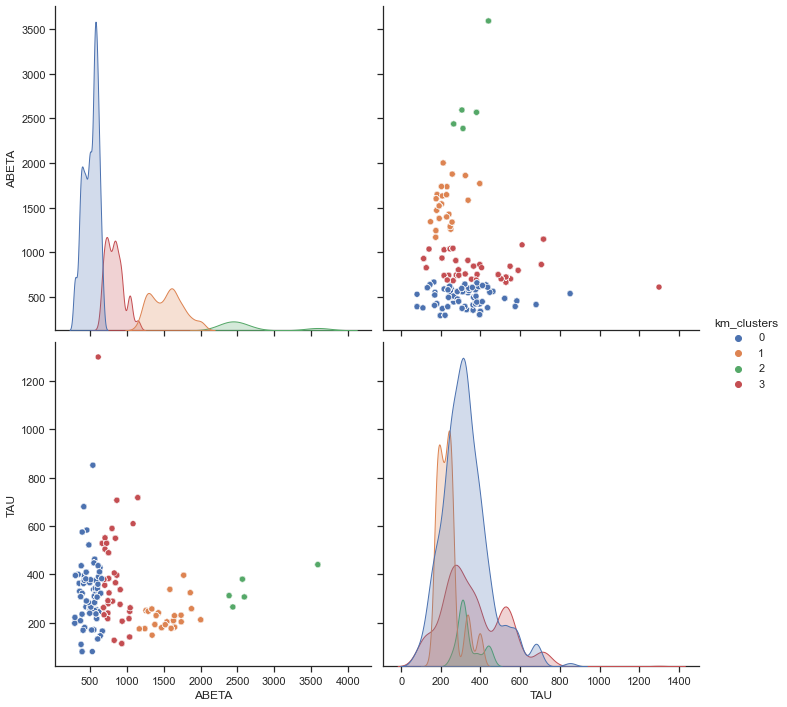

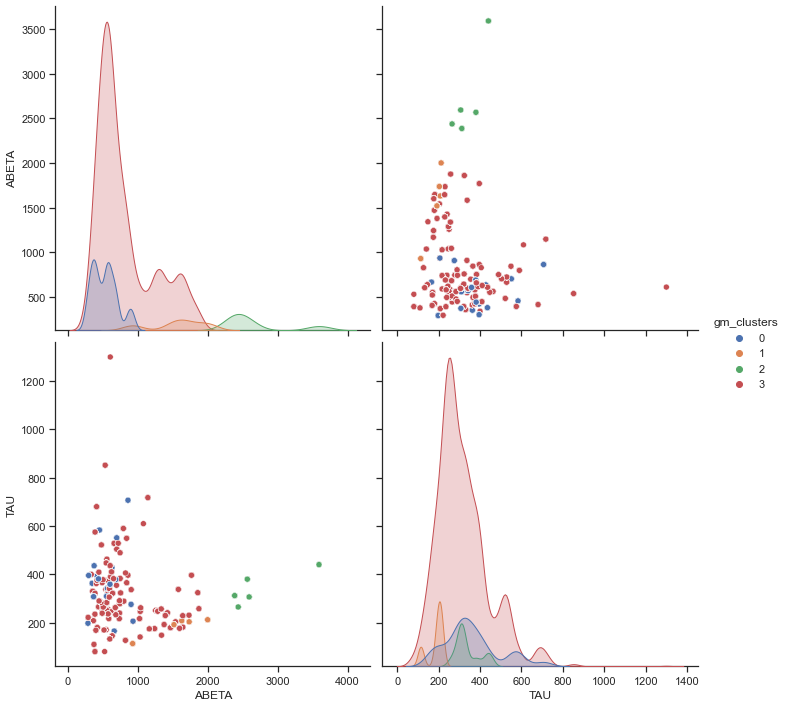

In [315]:
clusters4 = fit_cluster_model_and_visualize(base_df2, comps=4, state_use=65, feature_use_list=['ABETA','TAU'], save=False)

In [342]:
def relabel_clusters(df,cluster_type = 'km_clusters'):
    
    collect = []
    
    list_size = df[cluster_type].shape[0]
    
    list_use = df[cluster_type].tolist()
    
    for i in range(list_size):
        
        if list_use[i] == 3:
            
            collect.append(4)
            
        elif list_use[i] ==2:
            
            collect.append(3)
            
        elif list_use[i] == 1:
            
            collect.append(2)
            
        else:
            
            collect.append(1)
            
    df_use = df
    
    df_use[cluster_type] = collect
    
    df_use[cluster_type] = df_use[cluster_type].astype('category')
    
    return df_use
    

In [373]:
clusters3 = relabel_clusters(clusters3,cluster_type = 'km_clusters')

In [369]:
clusters3.km_clusters.value_counts()

2    1858
1     490
3     108
Name: km_clusters, dtype: int64

In [374]:
clusters3 = relabel_clusters(clusters3,cluster_type = 'gm_clusters')

In [375]:
clusters3.gm_clusters.value_counts()

2    1713
1     635
3     108
Name: gm_clusters, dtype: int64

# What are the clusters representing

# Checking in with the transitioned data

In [384]:
normals_that_transitioned = pd.read_csv('./normal_bl_that_transitioned_revised.csv')

In [412]:
normals_that_transitioned.drop(columns=['Unnamed: 0']).head()

,Phase_x,ID_x,RID,PTID,SITEID_x,VISCODE,VISCODE2,USERDATE_x,USERDATE2_x,EXAMDATE_x,...,EXAMDATE_y,RUNDATE,ABETA,PTAU,TAU,MMSCORE,APGEN1,APGEN2,TOTAL11,TOTALMOD
0,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2007-06-13,2016-11-28,873.0,11.26,137.6,26.0,3,3,-4.00,-4.00
1,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2007-06-13,2016-11-28,873.0,11.26,137.6,26.0,3,3,6.00,8.00
2,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2007-06-13,2016-11-28,873.0,11.26,137.6,26.0,3,3,4.67,12.67
3,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2007-06-13,2016-11-28,873.0,11.26,137.6,26.0,3,3,7.67,12.67
4,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2007-06-13,2016-11-28,873.0,11.26,137.6,26.0,3,3,5.00,10.00


In [410]:
normals_that_transitioned.columns

Index(['Unnamed: 0', 'Phase_x', 'ID_x', 'RID', 'PTID', 'SITEID_x', 'VISCODE',
       'VISCODE2', 'USERDATE_x', 'USERDATE2_x', 'EXAMDATE_x', 'DXCHANGE',
       'DXCURREN', 'DXCONV', 'DXCONTYP', 'DXREV', 'DXNORM', 'DXNODEP', 'DXMCI',
       'DXMDES', 'DXMPTR1', 'DXMPTR2', 'DXMPTR3', 'DXMPTR4', 'DXMPTR5',
       'DXMPTR6', 'DXMDUE', 'DXMOTHET', 'DXMOTHSP', 'DXDSEV', 'DXDDUE', 'DXAD',
       'DXADES', 'DXAPP', 'DXAPROB', 'DXAMETASP', 'DXAOTHRSP', 'DXAPOSS',
       'DXAATYSP', 'DXAMETSP', 'DXAOTHSP', 'DXPARK', 'DXPARKSP', 'DXPDES',
       'DXPCOG', 'DXPATYP', 'DXPOTHSP', 'DXDEP', 'DXDEPSP', 'DXOTHDEM',
       'DXODES', 'DXOOTHSP', 'DXCONFID', 'DIAGNOSIS', 'update_stamp_x',
       'Phase_y', 'ID_y', 'SITEID_y', 'VISCODE_x', 'VISCODE2_x', 'USERDATE_y',
       'USERDATE2_y', 'PTSOURCE', 'PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND',
       'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT',
       'PTRTYR', 'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC',
       'PTCOGBEG', 

In [262]:
normals_that_transitioned.shape

(263900, 98)

In [264]:
print(len([*set(normals_that_transitioned['RID'])]),'unique RID')

101 unique RID


# Add event and months to baseline data from the transitioned data

In [265]:
normals_that_transitioned.DIAGNOSIS.value_counts()

1.0    11796
3.0     8064
2.0      520
Name: DIAGNOSIS, dtype: int64

In [292]:
transitioned_df_mini = normals_that_transitioned[['RID','DIAGNOSIS']]

In [376]:
df_abeta_tau_and_transitioned = clusters3.merge(transitioned_df_mini, how ='inner', on = 'RID')

df_abeta_tau_and_transitioned = df_abeta_tau_and_transitioned.drop_duplicates()

In [294]:
print(len([*set(df_abeta_tau_and_transitioned['RID'])]))

101


In [357]:
df_abeta_tau_and_transitioned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 8186074
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ABETA        2312 non-null   float64 
 1   TAU          2312 non-null   float64 
 2   PTAU         2312 non-null   float64 
 3   TOTAL11      2312 non-null   float64 
 4   TOTALMOD     2312 non-null   float64 
 5   APGEN1       2312 non-null   int64   
 6   APGEN2       2312 non-null   int64   
 7   MMSCORE      2312 non-null   float64 
 8   km_clusters  2312 non-null   category
 9   gm_clusters  2312 non-null   category
 10  RID          2312 non-null   int64   
 11  DIAGNOSIS    180 non-null    category
dtypes: category(3), float64(6), int64(3)
memory usage: 187.8 KB


In [378]:
df_abeta_tau_and_transitioned.groupby(by=['km_clusters','DIAGNOSIS'])['DIAGNOSIS'].count()

km_clusters  DIAGNOSIS
1            1.0          57
             2.0          20
             3.0          78
2            1.0          25
             2.0           0
             3.0           0
3            1.0           0
             2.0           0
             3.0           0
Name: DIAGNOSIS, dtype: int64

In [379]:
df_abeta_tau_and_transitioned.groupby(by=['gm_clusters','DIAGNOSIS'])['DIAGNOSIS'].count()

gm_clusters  DIAGNOSIS
1            1.0          70
             2.0          20
             3.0           0
2            1.0          12
             2.0           0
             3.0          78
3            1.0           0
             2.0           0
             3.0           0
Name: DIAGNOSIS, dtype: int64

# Data from dissertation

In [387]:
full_data = pd.read_csv("~/Documents/Dissertation/full_data_new_july2.csv")

In [399]:
full_data.shape

(114, 26)

In [400]:
full_data.head()

,RID,VISCODE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTRACCAT,APOE4,CDRSB,ADAS11,...,FAQ,MMSE_bl,TAU,ABETA142,PTAU181P,LogTau,LogAbeta,LogPtau,Event,time
0,5,bl,CN,73.7,Male,16,White,0,0.0,8.67,...,0,29,112,115,68,2.049218,2.060698,1.832509,0,36
1,8,bl,CN,84.5,Female,18,White,0,0.0,5.00,...,0,28,124,276,31,2.093422,2.440909,1.491362,0,96
2,14,bl,CN,78.5,Female,12,White,0,0.0,4.33,...,0,29,58,268,20,1.763428,2.428135,1.301030,0,36
3,16,bl,CN,65.4,Male,9,Black,1,0.0,10.33,...,0,28,40,135,17,1.602060,2.130334,1.230449,0,36
4,19,bl,CN,73.1,Female,18,White,0,0.0,3.00,...,0,29,62,260,17,1.792392,2.414973,1.230449,0,36


# Common RID with respect to new data

In [549]:
common_rid = []

for rid in clusters3.RID:
    
    for rid2 in full_data.RID:
        
        if rid == rid2:
            
            common_rid.append(rid)
        
        else:
            
            pass


In [531]:
len([*set(common_rid)])

32

In [391]:
len([*set(full_data.RID)])

114

In [392]:
len([*set(clusters3.RID)])

129

In [393]:
len([*set(normals_that_transitioned.RID)])

101

In [550]:
uniq_clusters3_rid = [*set(clusters3.RID)]

uniq_norm_trans_rid = [*set(normals_that_transitioned.RID)]

In [551]:
common_trans_rid = []

for rid in uniq_clusters3_rid:
    
    for rid2 in uniq_norm_trans_rid:
        
        if rid == rid2:
            
            common_trans_rid.append(rid)
        
        else:
            
            pass

In [552]:
len([*set(common_trans_rid)])

101

# Gather max time for each transitioned patient

In [591]:
collect_trans_month = []

collect_between = []

for rid in uniq_norm_trans_rid:
    
    mn_list = normals_that_transitioned[normals_that_transitioned['RID']== rid]['VISCODE'].tolist()
    
    for mn in mn_list:
        
        mn_reduce = mn[1:]
        
#         print(mn_reduce)
        
        if mn_reduce !='nit':
        
            collect_between.append(float(mn_reduce))
            
        else:
            
            pass
        
    collect_trans_month.append(max(collect_between))

In [592]:
len(collect_trans_month)

101

In [536]:
collect_trans_month[0:10]

[48.0, 48.0, 48.0, 48.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]

# Get event and transitioned patient

In [579]:
event = []

base_rid = base_df2.RID.tolist()

for rid in base_rid:
          
    if rid in uniq_norm_trans_rid:
        
        event.append(1)
        
    else:
            
        event.append(0)

base_df2['event'] = event

In [577]:
len(base_rid)

4852

In [578]:
len(event)

4852

## Unique counts

In [584]:
base_df2_uniq_rid = base_df2.drop_duplicates(subset='RID')

In [585]:
base_df2_uniq_rid['event'].value_counts()

1    101
0     28
Name: event, dtype: int64

In [586]:
base_df2_uniq_rid.head()

,RID,VISCODE,DXCHANGE,DXCURREN,DXCONV,DXCONTYP,DXREV,DXNORM,DXNODEP,DXMCI,...,rptaubeta,ABETA_scaled,TAU_scaled,PTAU_scaled,TOTAL11_scaled,TOTALMOD_scaled,APGEN1_scaled,APGEN2_scaled,MMSCORE_scaled,event
0,514,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,0.012591,-0.193,-1.550,-1.492,-2.305,-2.320,0.064,-0.937,0.209,1
56,3,bl,NaN,3.0,0.0,-4.0,-4.0,-4.0,-4.0,-4.0,...,0.030789,-0.338,-0.590,-0.574,2.065,1.996,0.064,1.067,-1.042,1
72,516,bl,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,...,0.015914,1.566,0.124,-0.073,-0.636,-0.629,0.064,-0.937,0.418,0
82,5,bl,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,...,0.061082,-0.669,0.235,0.210,-0.733,-0.697,0.064,-0.937,0.835,1
92,1030,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,0.046173,-0.132,0.737,0.683,-1.028,-0.490,0.064,-0.937,0.626,1


# Fit to unique RID

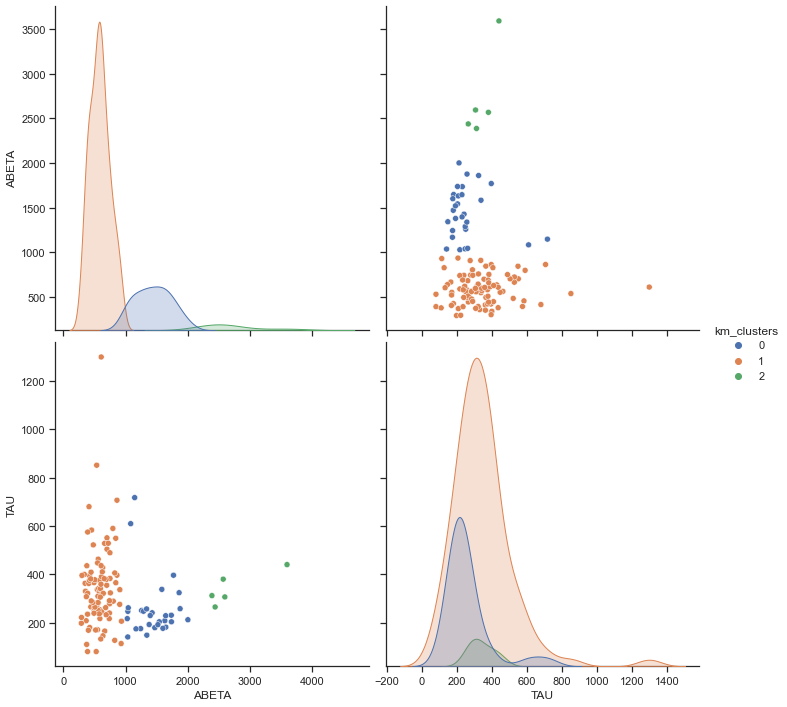

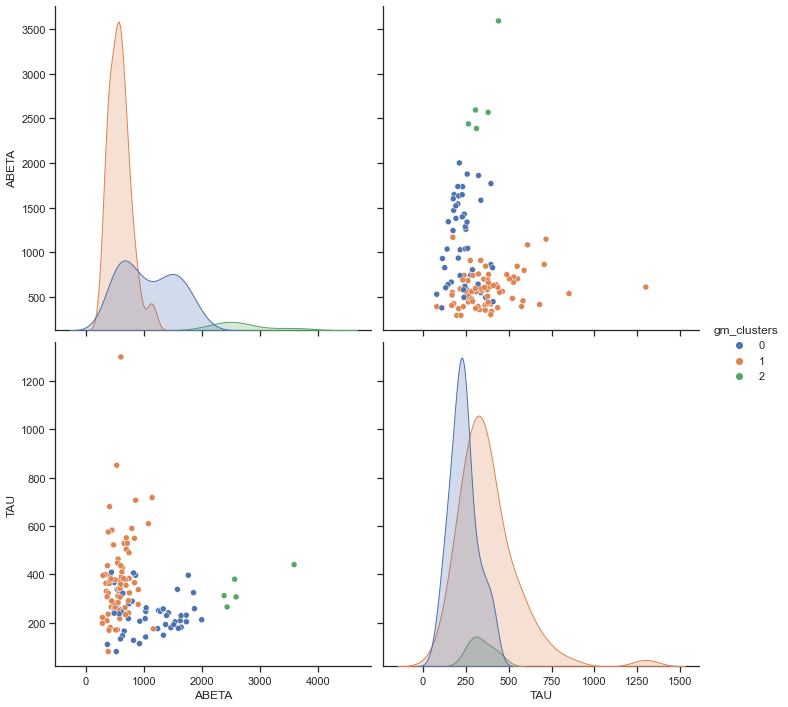

In [587]:
clusters3_un1 = fit_cluster_model_and_visualize(base_df2_uniq_rid, comps=3, state_use=70, feature_use_list=['ABETA','TAU'], save=False)

# Add time

In [595]:
df_time = pd.DataFrame({'RID':uniq_norm_trans_rid,'time':collect_trans_month})

In [596]:
df_time.shape

(101, 2)

In [602]:
base_df2_uniq_rid2 = base_df2_uniq_rid.merge(df_time, how = 'left', on ='RID')

In [603]:
base_df2_uniq_rid2.shape

(129, 89)

In [605]:
base_df2_uniq_rid2.head()

,RID,VISCODE,DXCHANGE,DXCURREN,DXCONV,DXCONTYP,DXREV,DXNORM,DXNODEP,DXMCI,...,ABETA_scaled,TAU_scaled,PTAU_scaled,TOTAL11_scaled,TOTALMOD_scaled,APGEN1_scaled,APGEN2_scaled,MMSCORE_scaled,event,time
0,514,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,-0.193,-1.550,-1.492,-2.305,-2.320,0.064,-0.937,0.209,1,48.0
1,3,bl,NaN,3.0,0.0,-4.0,-4.0,-4.0,-4.0,-4.0,...,-0.338,-0.590,-0.574,2.065,1.996,0.064,1.067,-1.042,1,48.0
2,516,bl,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,...,1.566,0.124,-0.073,-0.636,-0.629,0.064,-0.937,0.418,0,NaN
3,5,bl,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,...,-0.669,0.235,0.210,-0.733,-0.697,0.064,-0.937,0.835,1,48.0
4,1030,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,-0.132,0.737,0.683,-1.028,-0.490,0.064,-0.937,0.626,1,48.0


# Check that patients without event have nan transition time because we don't know 

In [606]:
base_df2_uniq_rid2[base_df2_uniq_rid2['event']==0]

,RID,VISCODE,DXCHANGE,DXCURREN,DXCONV,DXCONTYP,DXREV,DXNORM,DXNODEP,DXMCI,...,ABETA_scaled,TAU_scaled,PTAU_scaled,TOTAL11_scaled,TOTALMOD_scaled,APGEN1_scaled,APGEN2_scaled,MMSCORE_scaled,event,time
2,516,bl,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,...,1.566,0.124,-0.073,-0.636,-0.629,0.064,-0.937,0.418,0,NaN
22,578,bl,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,...,-0.604,-0.476,-0.224,-0.537,-0.766,0.064,-0.937,1.044,0,NaN
26,590,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,-0.562,8.404,6.612,0.493,0.270,0.064,1.067,0.418,0,NaN
45,692,bl,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,...,-0.935,-1.945,-1.670,-0.733,-0.800,0.064,1.067,0.835,0,NaN
46,1210,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,-0.192,0.817,0.704,-0.783,-0.732,0.064,-0.937,1.044,0,NaN
61,1263,bl,NaN,3.0,0.0,-4.0,-4.0,-4.0,-4.0,-4.0,...,-0.412,0.384,0.256,0.887,1.064,0.064,1.067,0.209,0,NaN
63,768,bl,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,...,-0.913,-1.196,-0.868,-0.733,-0.490,0.064,1.067,1.044,0,NaN
71,1294,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,1.0,1.0,...,-0.647,-0.500,-0.235,1.819,-2.320,0.064,1.067,0.626,0,NaN
75,1304,bl,NaN,3.0,0.0,-4.0,-4.0,-4.0,-4.0,-4.0,...,-1.025,0.766,1.053,1.426,1.650,0.064,1.067,0.001,0,NaN
81,814,bl,NaN,3.0,0.0,-4.0,-4.0,-4.0,-4.0,-4.0,...,-0.324,1.526,1.402,3.045,2.583,0.064,1.067,-0.834,0,NaN


In [607]:
base_df2_uniq_rid2.columns

Index(['RID', 'VISCODE', 'DXCHANGE', 'DXCURREN', 'DXCONV', 'DXCONTYP', 'DXREV',
       'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES', 'DXMPTR1', 'DXMPTR2', 'DXMPTR3',
       'DXMPTR4', 'DXMPTR5', 'DXMPTR6', 'DXMDUE', 'DXMOTHET', 'DXMOTHSP',
       'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES', 'DXAPP', 'DXAPROB', 'DXAMETASP',
       'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP', 'DXAMETSP', 'DXAOTHSP', 'DXPARK',
       'DXPARKSP', 'DXPDES', 'DXPCOG', 'DXPATYP', 'DXPOTHSP', 'DXDEP',
       'DXDEPSP', 'DXOTHDEM', 'DXODES', 'DXOOTHSP', 'DXCONFID', 'DIAGNOSIS',
       'PTSOURCE', 'PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND', 'PTMARRY',
       'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT', 'PTRTYR',
       'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC', 'PTCOGBEG',
       'PTMCIBEG', 'PTADBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT', 'RUNDATE',
       'ABETA', 'PTAU', 'TAU', 'TOTAL11', 'TOTALMOD', 'APGEN1', 'APGEN2',
       'MMSCORE', 'rtaubeta', 'rptaubeta', 'ABETA_scaled', 'TAU_scaled',
       'PTAU_scaled

In [609]:
!pwd

/Volumes/GoogleDrive/My Drive/Desktop/ADNI_DATA


# Rename the features to match the full_data in the original dissertation code

In [610]:
full_data.columns

Index(['RID', 'VISCODE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTRACCAT',
       'APOE4', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate',
       'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'FAQ',
       'MMSE_bl', 'TAU', 'ABETA142', 'PTAU181P', 'LogTau', 'LogAbeta',
       'LogPtau', 'Event', 'time'],
      dtype='object')

In [619]:
base_df2_uniq_rid3 = base_df2_uniq_rid2.rename(columns={'ABETA':'ABETA142', 'PTAU':'PTAU181P','event':'Event',
                                               'MMSCORE':'MMSE_bl','APGEN1':'APOE4','TOTAL11':'ADAS11'})

In [620]:
base_df2_uniq_rid3.columns

Index(['RID', 'VISCODE', 'DXCHANGE', 'DXCURREN', 'DXCONV', 'DXCONTYP', 'DXREV',
       'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES', 'DXMPTR1', 'DXMPTR2', 'DXMPTR3',
       'DXMPTR4', 'DXMPTR5', 'DXMPTR6', 'DXMDUE', 'DXMOTHET', 'DXMOTHSP',
       'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES', 'DXAPP', 'DXAPROB', 'DXAMETASP',
       'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP', 'DXAMETSP', 'DXAOTHSP', 'DXPARK',
       'DXPARKSP', 'DXPDES', 'DXPCOG', 'DXPATYP', 'DXPOTHSP', 'DXDEP',
       'DXDEPSP', 'DXOTHDEM', 'DXODES', 'DXOOTHSP', 'DXCONFID', 'DIAGNOSIS',
       'PTSOURCE', 'PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND', 'PTMARRY',
       'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT', 'PTRTYR',
       'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC', 'PTCOGBEG',
       'PTMCIBEG', 'PTADBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT', 'RUNDATE',
       'ABETA142', 'PTAU181P', 'TAU', 'ADAS11', 'TOTALMOD', 'APOE4', 'APGEN2',
       'MMSE_bl', 'rtaubeta', 'rptaubeta', 'ABETA_scaled', 'TAU_scaled',
       'PTAU_s

In [625]:
yob = base_df2_uniq_rid3.PTDOBYY.tolist()

In [627]:
get_age = []

for y in yob:
    
    out = 2022-float(y)
    
    get_age.append(out)

In [629]:
get_age

[97.0,
 98.0,
 104.0,
 91.0,
 83.0,
 101.0,
 91.0,
 91.0,
 82.0,
 90.0,
 97.0,
 80.0,
 88.0,
 93.0,
 81.0,
 92.0,
 98.0,
 90.0,
 90.0,
 94.0,
 94.0,
 89.0,
 93.0,
 87.0,
 90.0,
 88.0,
 94.0,
 88.0,
 85.0,
 93.0,
 87.0,
 87.0,
 92.0,
 100.0,
 98.0,
 85.0,
 92.0,
 99.0,
 95.0,
 77.0,
 78.0,
 94.0,
 96.0,
 100.0,
 96.0,
 93.0,
 90.0,
 103.0,
 97.0,
 92.0,
 93.0,
 87.0,
 84.0,
 102.0,
 94.0,
 88.0,
 94.0,
 95.0,
 87.0,
 87.0,
 105.0,
 80.0,
 83.0,
 93.0,
 93.0,
 87.0,
 95.0,
 95.0,
 95.0,
 95.0,
 92.0,
 95.0,
 95.0,
 92.0,
 99.0,
 90.0,
 82.0,
 85.0,
 101.0,
 104.0,
 96.0,
 87.0,
 77.0,
 87.0,
 97.0,
 87.0,
 85.0,
 89.0,
 93.0,
 88.0,
 100.0,
 95.0,
 103.0,
 87.0,
 92.0,
 100.0,
 95.0,
 92.0,
 87.0,
 93.0,
 85.0,
 85.0,
 89.0,
 89.0,
 100.0,
 81.0,
 93.0,
 91.0,
 96.0,
 87.0,
 99.0,
 90.0,
 91.0,
 91.0,
 96.0,
 100.0,
 89.0,
 102.0,
 83.0,
 94.0,
 87.0,
 104.0,
 87.0,
 90.0,
 94.0,
 94.0,
 96.0,
 71.0,
 74.0]

In [631]:
base_df2_uniq_rid3['AGE'] = get_age

In [634]:
base_df2_uniq_rid3.columns

Index(['RID', 'VISCODE', 'DXCHANGE', 'DXCURREN', 'DXCONV', 'DXCONTYP', 'DXREV',
       'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES', 'DXMPTR1', 'DXMPTR2', 'DXMPTR3',
       'DXMPTR4', 'DXMPTR5', 'DXMPTR6', 'DXMDUE', 'DXMOTHET', 'DXMOTHSP',
       'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES', 'DXAPP', 'DXAPROB', 'DXAMETASP',
       'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP', 'DXAMETSP', 'DXAOTHSP', 'DXPARK',
       'DXPARKSP', 'DXPDES', 'DXPCOG', 'DXPATYP', 'DXPOTHSP', 'DXDEP',
       'DXDEPSP', 'DXOTHDEM', 'DXODES', 'DXOOTHSP', 'DXCONFID', 'DIAGNOSIS',
       'PTSOURCE', 'PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND', 'PTMARRY',
       'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT', 'PTRTYR',
       'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC', 'PTCOGBEG',
       'PTMCIBEG', 'PTADBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT', 'RUNDATE',
       'ABETA142', 'PTAU181P', 'TAU', 'ADAS11', 'TOTALMOD', 'APOE4', 'APGEN2',
       'MMSE_bl', 'rtaubeta', 'rptaubeta', 'ABETA_scaled', 'TAU_scaled',
       'PTAU_s

In [635]:
base_df2_uniq_rid3.to_csv('./baseline_data_with_event_and_trans_time.csv', index = False)